In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import numpy as np
import pandas as pd
import csv
mpl.rc('font',family = 'Malgun Gothic')
mpl.rcParams['axes.unicode_minus'] = False   
plt.rcParams["font.family"] = 'Malgun Gothic'
plt.rcParams["figure.figsize"] = (15,5)
plt.rcParams["font.size"] = 15
%matplotlib inline

# 1. Matplotlib을 사용하여 월별 카페의 개수를 나타내는 간단한 막대그래프를 그리는 프로그램을 작성하시오. 단, 막대 그래프의 X축 간격을 3달로 설정한다.

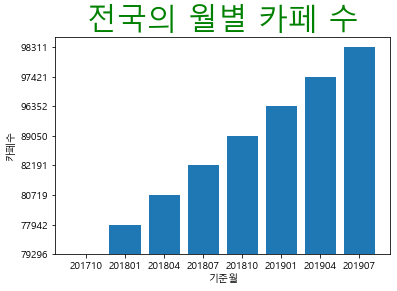

In [69]:
f = open('cafe_2year.csv','r',encoding='utf-8')
lines = csv.reader(f)
header = next(lines)

list_data = []
for line in lines :
    list_data.append(line[:])
    
f.close()

xdata = []
ydata = []
for i in range(0,len(list_data)):
    if i % 3 == 0:
        for j in range(0,2):
            if j == 0:
                xdata.append(list_data[i][j])
            elif j == 1:
                ydata.append(list_data[i][j])
            
plt.title('전국의 월별 카페 수', color='g', fontsize='30')
plt.bar(xdata,ydata)

plt.xlabel(header[0])
plt.ylabel(header[1])

plt.show()

# 2. CSV파일을 읽어서 서울과 6개의 광역서(부산, 대구, 인천, 대전, 광주, 울산)에 대해 지역, 일반의 인턴, 레지던트, 전문의 의사수를 출력하는 프로그램을 작성하시오.

In [205]:
def data_input(lines):
    for line in lines:
        for i in range(len(area)):
            if line[0] == area[i]:
                for j in range(0,4):
                    result[area.index(line[0])][j] += int(line[j+2])
    return result

def print_output(data):
    for i in header:
        print(i,end=' ')
    print()
    
    for i in range(0,len(data)):
        print(area[i],end='')
        for j in range(0,4):
            print('%8d ' %data[i][j],end='')
        print()
file = open('doctor_2019.csv','r',encoding='utf-8')
lines = csv.reader(file)
header = next(lines)
result = np.zeros(shape=(28,), dtype=np.int64).reshape(7,4)
area = ['서울','부산','대구','인천','대전','광주','울산']
    
data = data_input(lines)
    
file.close()
header.pop(1)

print_output(data)

지역 일반의 수 인턴 수 레지던트 수 전문의 수 
서울     162     1196     4757     9375 
부산      58      197      785     2211 
대구      27      215      712     1436 
인천      47      138      444     1518 
대전      25      142      425     1006 
광주      16      102      356     1006 
울산      19       23      104      467 


# 3. 2번 문제에서 얻은 결과를 csv파일로 저장하는 프로그램을 작성하시오.

In [211]:
file = open('doctor52.csv','w',encoding='utf-8',newline='')
wr = csv.writer(file)

wr.writerow(header)

for i in range(7) :     
    wr.writerow([area[i], data[i][0], data[i][1], data[i][2], data[i][3]])

file.close()

# 4. 3번 문제에서 저장한 파일을 읽어들여 서울과 6개 광역시의 종합 병원 전문의 의사 수를 산포그래프로 보여 주는 프로그램을 작성하시오.

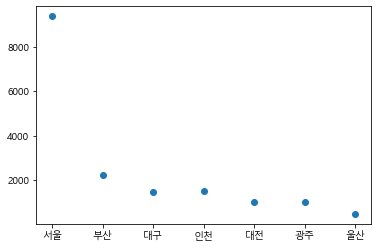

In [214]:
file = open('doctor52.csv','r',encoding='utf-8')
lines = csv.reader(file)
header = next(lines)
xdata = []
ydata = []
for line in lines :
    xdata.append(line[0])
    ydata.append(int(line[4]))
    
plt.scatter(xdata,ydata)
plt.show()
file.close()

# 5. 4번 문제에서 사용한 파일을 읽어 서울과 6개 광역시의 종합병원의 일반의, 인턴, 레지던트, 전문의 수를 선 그래프로 나타내는 프로그램을 작성하시오.

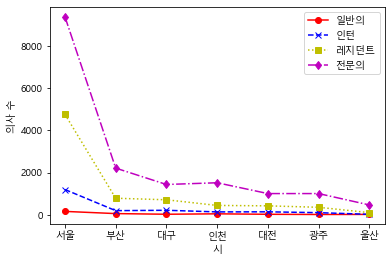

In [217]:
file = open('doctor52.csv','r',encoding='utf-8')
lines = csv.reader(file)
header = next(lines)
xdata = []
y1data = []
y2data = []
y3data = []
y4data = []
for line in lines :
    xdata.append(line[0])
    y1data.append(int(line[1]))
    y2data.append(int(line[2]))
    y3data.append(int(line[3]))
    y4data.append(int(line[4]))
    
plt.plot(xdata,y1data,'ro-',label='일반의')
plt.plot(xdata,y2data,'bx--',label='인턴')
plt.plot(xdata,y3data,'ys:',label='레지던트')
plt.plot(xdata,y4data,'md-.',label='전문의')


plt.xlabel('시')
plt.ylabel('의사 수')
plt.legend(loc='best')
plt.show()
file.close()

# 6. 4번 문제에서 사용한 파일을 읽어 서울 종합병원의 의사 수 분포를 의사 유형별로 나타내는 파이 그래프를 그리는 프로그램을 작성하시오.

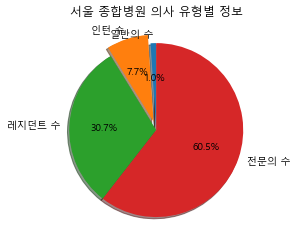

In [228]:
y1 = np.sum(y1data[0])
y2 = np.sum(y2data[0])
y3 = np.sum(y3data[0])
y4 = np.sum(y4data[0])

sum_y = y1+y2+y3+y4

h=[]

for i in range(1,5):
    h.append(header[i])

doctor_count = [y1,y2,y3,y4]/sum_y * 100

plt.pie(doctor_count,explode = (0,0.1,0,0), labels = h, autopct = '%1.1f%%', shadow = True , startangle=90)

plt.title('서울 종합병원 의사 유형별 정보')

plt.show()